In [1]:
import requests
import pandas as pd
import seaborn as sns

In [2]:
base_url = "https://impactco2.fr/api/v1"

# get categories

In [3]:
url = base_url + "/thematiques"
response = requests.get(url)
assert response.status_code == 200

In [4]:
#raw response
response.json()

{'data': [{'id': 1, 'name': 'Numérique', 'emoji': '💻', 'slug': 'numerique'},
  {'id': 2, 'name': 'Repas', 'emoji': '🍽', 'slug': 'repas'},
  {'id': 3, 'name': 'Boisson', 'emoji': '🍹', 'slug': 'boisson'},
  {'id': 4, 'name': 'Transport', 'emoji': '🚴\u200d♂️', 'slug': 'transport'},
  {'id': 5, 'name': 'Habillement', 'emoji': '👔', 'slug': 'habillement'},
  {'id': 6, 'name': 'Électroménager', 'emoji': '🛁', 'slug': 'electromenager'},
  {'id': 7, 'name': 'Mobilier', 'emoji': '🪑', 'slug': 'mobilier'},
  {'id': 8, 'name': 'Chauffage', 'emoji': '🏠', 'slug': 'chauffage'},
  {'id': 9,
   'name': 'Fruits et légumes',
   'emoji': '🍅',
   'slug': 'fruitsetlegumes'},
  {'id': 10,
   'name': 'Usage numérique',
   'emoji': '✉️',
   'slug': 'usagenumerique'}],
 'warning': "La requete n'est pas authentifée. Nous nous reservons le droit de couper cette API aux utilisateurs anonymes, veuillez nous contacter à impactco2@ademe.fr pour obtenir une clé d'API gratuite."}

In [5]:
#list categories
main_categories = response.json().get("data")
for main_category in main_categories:
    print(" ".join([main_category.get("emoji",""),main_category.get("name", "")]))

💻 Numérique
🍽 Repas
🍹 Boisson
🚴‍♂️ Transport
👔 Habillement
🛁 Électroménager
🪑 Mobilier
🏠 Chauffage
🍅 Fruits et légumes
✉️ Usage numérique


# get CO2 footprint by category

In [6]:
url = base_url + "/thematiques/ecv"

dfs = []
for main_category in main_categories:
    #one API call per category
    response = requests.get("/".join([url, main_category.get("slug")]))
    assert response.status_code == 200
    data = response.json().get("data", [])
    #store the results in a pandas dataframe
    df = pd.DataFrame(data)
    df["category"] = main_category.get("name", "")
    dfs.append(df)

In [7]:
#concatenate all dataframes into one
df = pd.concat(dfs).reset_index().drop(columns="index")
df

,name,slug,ecv,category
0,Smartphone[s],smartphone,37.785717,Numérique
1,Ordinateur[s] fixe[s] sans écran,ordinateurfixebureautique,188.972150,Numérique
2,Ordinateur[s] fixe[s] sans écran,ordinateurfixeperformance,394.228398,Numérique
3,Écran[s],ecran215pouces,236.400579,Numérique
4,Écran[s],ecran24pouces,263.270579,Numérique
...,...,...,...,...
177,Stocker un Go de donnée,stockagedonnee,0.000235,Usage numérique
178,Recherche[s] sur le web,rechercheweb,0.051042,Usage numérique
179,Streaming vidéo,streamingvideo,0.064017,Usage numérique
180,Visioconférence,visioconference,0.057063,Usage numérique


# display top 10 CO2 footprints

In [8]:
#display highest CO2 footprints
df.sort_values(by="ecv", ascending=False).head(10)

,name,slug,ecv,category
57,Paris - New-York,avion-pny,1770.000000,Transport
91,Armoire,armoire,906.880000,Mobilier
83,Lave-linge,lavelinge,510.257258,Électroménager
82,Lave-vaisselle,lavevaisselle,467.998218,Électroménager
92,Lit,lit,443.810000,Mobilier
10,Télévision[s],television,425.153496,Numérique
86,Climatiseur[s],climatiseur,413.881288,Électroménager
2,Ordinateur[s] fixe[s] sans écran,ordinateurfixeperformance,394.228398,Numérique
84,Réfrigérateur,refrigirateur,325.460716,Électroménager
4,Écran[s],ecran24pouces,263.270579,Numérique


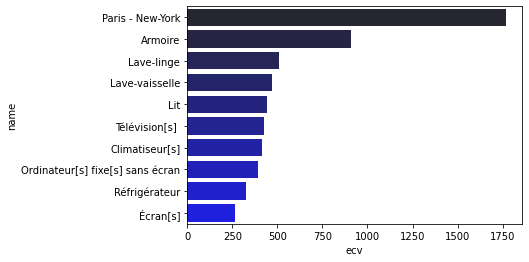

In [9]:
sns.barplot(data=df.sort_values(by="ecv", ascending=False).head(10), y="name", x="ecv", palette="dark:blue");